In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install tensorflow

In [5]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [6]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
# Visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 12565/12565 [00:06<00:00, 1811.34it/s]


In [8]:
data.shape

(22564, 2)

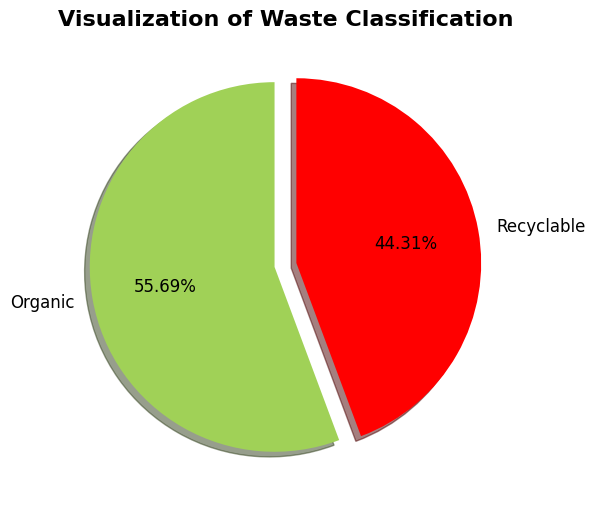

In [9]:
colors = ['#a0d157', '#ff0000']  # Updated the second color to red
explode = [0.06, 0.06]  # Slightly separated both slices for emphasis
labels = ['Organic', 'Recyclable']


plt.figure(figsize=(6, 6))
plt.pie(
    data.label.value_counts(),
    labels=labels,
    autopct='%0.2f%%',
    colors=colors,
    startangle=90,
    explode=explode,
    shadow=True,  # Add shadow for a 3D effect
    textprops={'fontsize': 12}  # Increase font size for readability
)

# Adding title
plt.title('Visualization of Waste Classification', fontsize=16, fontweight='bold')


plt.show()

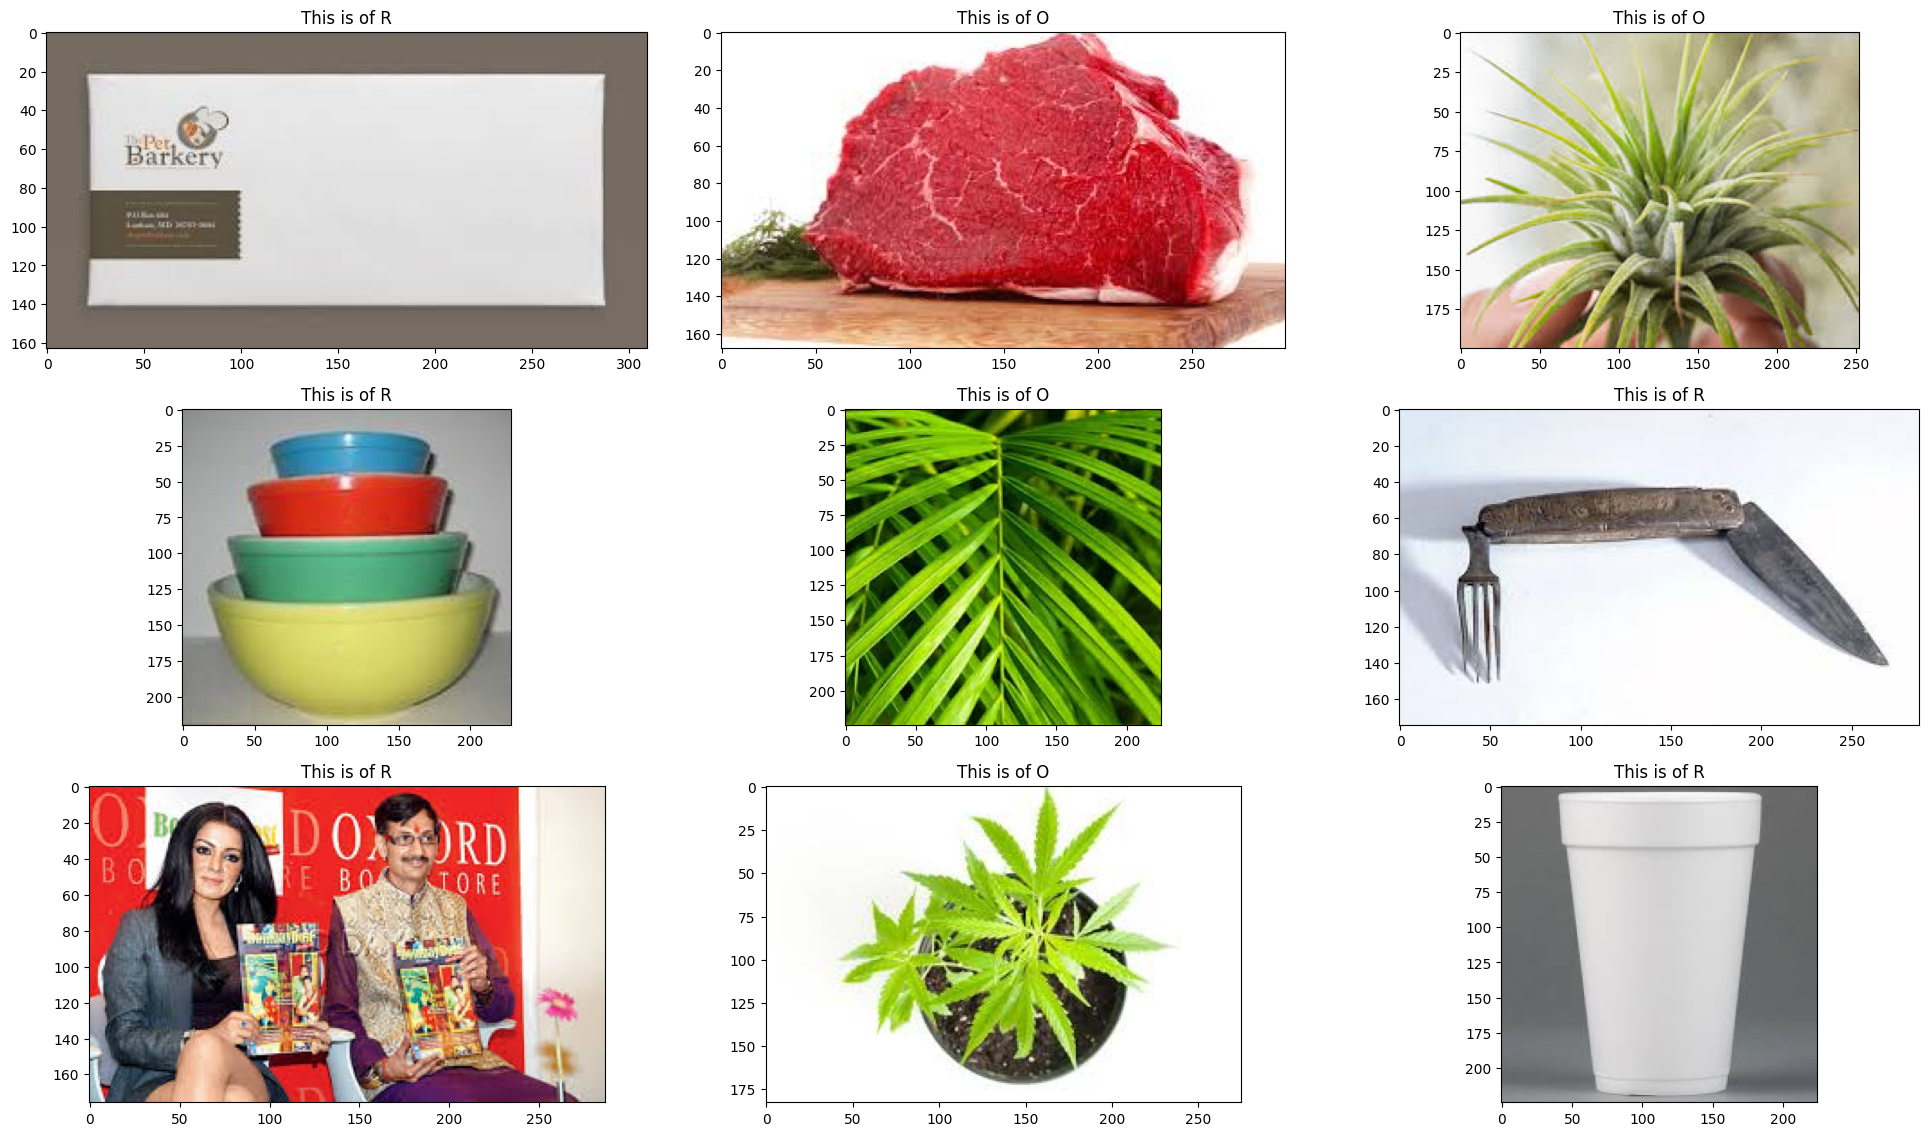

In [10]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
batch_size=64



In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_datagen= ImageDataGenerator(rescale=1./255)

In [14]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
train_generator=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=batch_size,color_mode="rgb",class_mode="categorical")
test_generator=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=batch_size,color_mode="rgb",class_mode="categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [16]:
hist=model.fit(train_generator,epochs=9,validation_data=test_generator)

Epoch 1/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 80s 194ms/step - accuracy: 0.7504 - loss: 0.5417 - val_accuracy: 0.8766 - val_loss: 0.3744
Epoch 2/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 60s 169ms/step - accuracy: 0.8311 - loss: 0.4073 - val_accuracy: 0.8838 - val_loss: 0.3100
Epoch 3/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.8495 - loss: 0.3719 - val_accuracy: 0.8842 - val_loss: 0.2858
Epoch 4/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 85s 170ms/step - accuracy: 0.8602 - loss: 0.3455 - val_accuracy: 0.8918 - val_loss: 0.2734
Epoch 5/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 57s 160ms/step - accuracy: 0.8734 - loss: 0.3175 - val_accuracy: 0.9041 - val_loss: 0.2715
Epoch 6/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 56s 157ms/step - accuracy: 0.8922 - loss: 0.2786 - val_accuracy: 0.8524 - val_loss: 0.3410
Epoch 7/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 155ms/step - accuracy: 0.9015 - loss: 0.2574 - val_accuracy: 0.9057 - val_loss: 0.2660
Epoch 8/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 58s 163ms/step - accuracy: 0.9250 - loss: 0.2108 - 

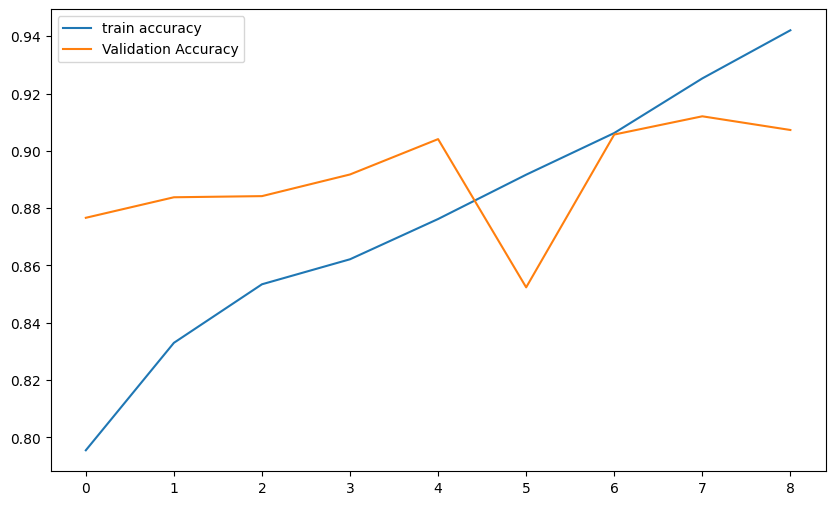

In [17]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()


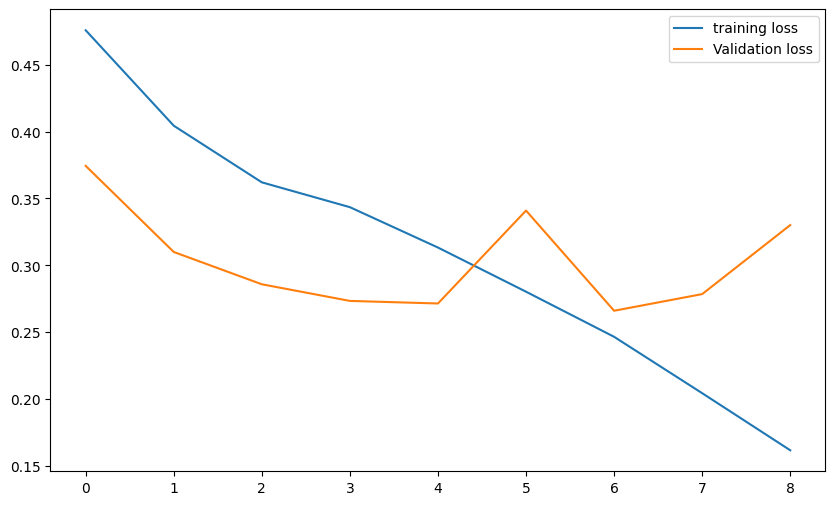

In [18]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()


In [19]:
def predict_fun(img):
  plt.figure(figsize=(6,4))
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img=cv2.resize(img,(224,224))
  img=np.reshape(img,[1,224,224,3])
  result=np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is recyclable waste')
  elif result == 1:
    print('The image shown is organic waste')








1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
The image shown is organic waste


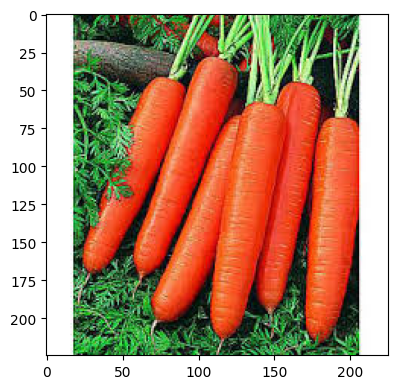

In [24]:
test_img=cv2.imread('/content/sample_data/O_12572.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
The image shown is organic waste


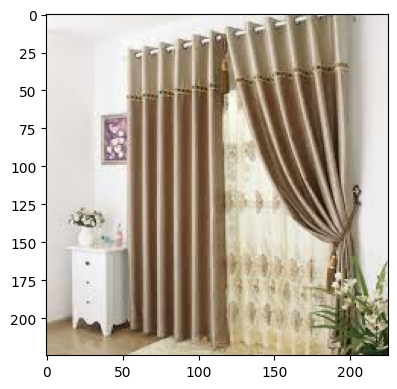

In [20]:
test_img=cv2.imread('/content/sample_data/R_10008.jpg')
predict_fun(test_img)